In [2]:
import sys
import os

# Get the absolute path of the root directory (one level up from "notebooks")
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add it to sys.path
sys.path.append(root_dir)

In [62]:
from sklearn.cluster import BisectingKMeans, MiniBatchKMeans
import skfuzzy as fuzz

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from src.data.data_transformations import img_to_tabular
from src.models.build_models import build_bisecting_kmeans
img = Image.open("../data/raw/img.jpg")

img, img_np, img_flat, img_tab = img_to_tabular(img)

img_tab_sample = img_tab.sample(n=1000).sort_index()
img_flat_sample = img_tab_sample.values


In [3]:
img_flat_sample.shape

(1000, 3)

In [5]:
model = BisectingKMeans()
model.fit(img_flat)

BisectingKMeans()

In [8]:
model.cluster_centers_

array([[198.89048018,  75.99286154, 100.55006988],
       [136.18840025,  61.33479509,  65.98395673],
       [215.45727465, 132.4896176 ,   9.02405405],
       [202.23055635, 113.62606548,  66.88172131],
       [195.56121369, 173.50070803, 206.66110783],
       [ 81.93227972, 155.51284448, 190.34140539],
       [197.54091588, 118.23935038, 155.69725805],
       [104.17243947,  95.71452156, 139.26547326]])

In [3]:
import time

elapsed, inertia, cluster_centers, compressed_img, compressed_img_pil = build_bisecting_kmeans(img_flat=img_flat, img_np=img_np, n=4, initialization='random', n_initialization=1, bisecting_strat="largest_cluster")

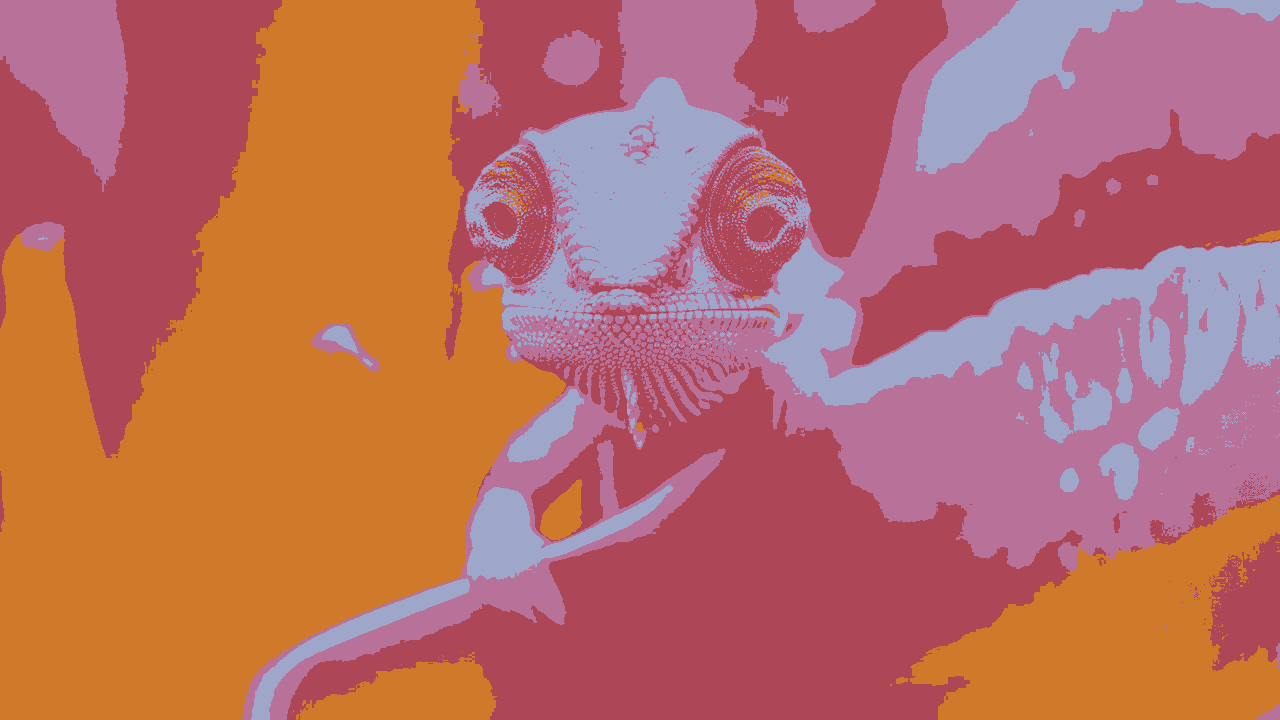

In [4]:
compressed_img_pil


In [4]:
model = MiniBatchKMeans()
model.fit(img_flat)

MiniBatchKMeans()

In [33]:
img_flat.T

array([[191, 191, 191, ..., 190, 190, 190],
       [ 63,  63,  63, ..., 144, 144, 144],
       [165, 165, 165, ..., 119, 119, 119]], dtype=uint8)

In [34]:
cntr, u, _, _, _, _, _ = fuzz.cmeans(data=img_flat.T, c=4, m = 2, error=0.005, maxiter=1000)

In [41]:
cluster_membership = np.argmax(u, axis=0)
set(cluster_membership

{0, 1, 2, 3}

In [102]:
cluster_membership

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
df = pd.DataFrame(u.T)


In [60]:
df.describe()

,0,1,2,3
count,921600.000000,921600.000000,921600.000000,921600.000000
mean,0.297816,0.224455,0.242349,0.235380
std,0.223189,0.268648,0.256743,0.220974
min,0.000132,0.000119,0.000039,0.000056
25%,0.129005,0.044474,0.063158,0.089645
50%,0.225629,0.088584,0.115882,0.140051
75%,0.431518,0.327171,0.358303,0.300537
max,0.999563,0.999774,0.998679,0.998188


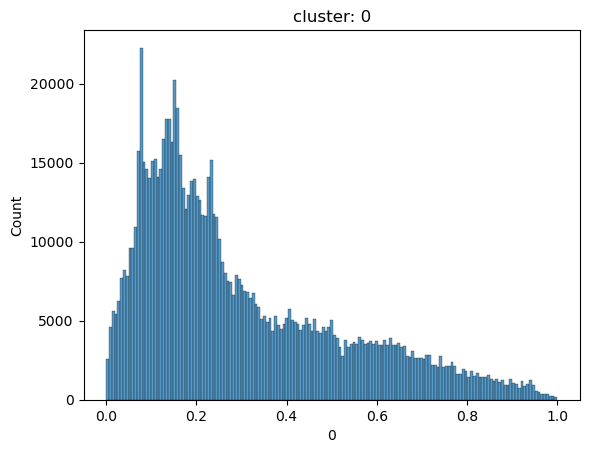

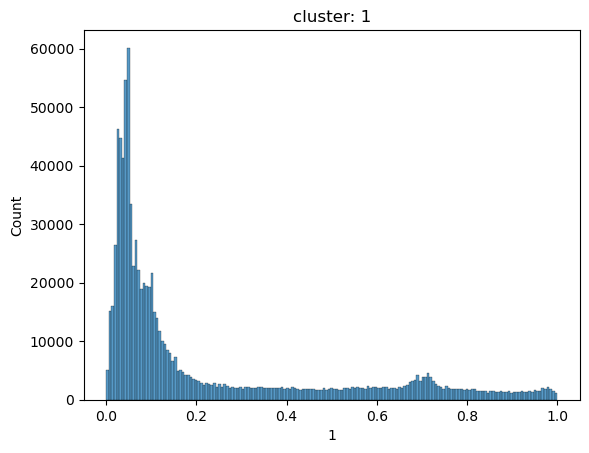

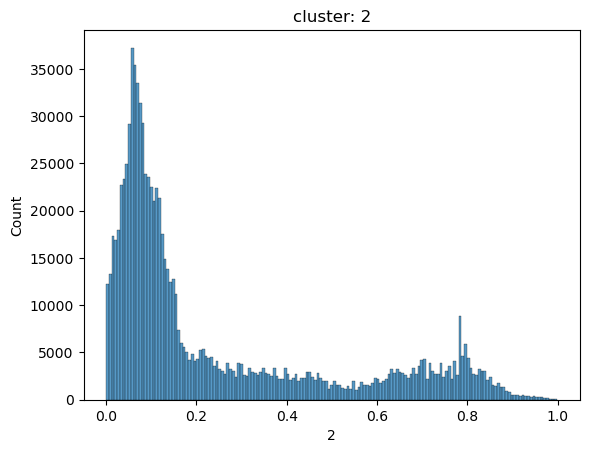

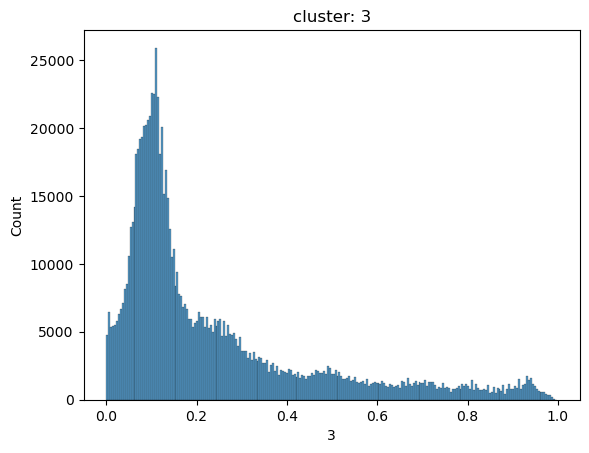

In [70]:
df.columns = ['0', '1', '2', '3']
import seaborn as sns
for col in df.columns:
    plt.subplots()
    plt.title(f"cluster: {col}")
    sns.histplot(df[col])

,0,1,2,3
0,0.456527,0.259066,0.082206,0.202201
1,0.456527,0.259066,0.082206,0.202201
2,0.456527,0.259066,0.082206,0.202201
3,0.456527,0.259066,0.082206,0.202201
4,0.450044,0.271283,0.082081,0.196592
...,...,...,...,...
921595,0.467434,0.285707,0.117652,0.129207
921596,0.467434,0.285707,0.117652,0.129207
921597,0.467434,0.285707,0.117652,0.129207
921598,0.467434,0.285707,0.117652,0.129207


In [100]:
labels = pd.DataFrame(np.argmax(u.T, axis=1))
pd.concat([df, labels], axis=1, names=list(df.columns).append('labels')).head()

,0,1,2,3,0
0,0.456527,0.259066,0.082206,0.202201,0
1,0.456527,0.259066,0.082206,0.202201,0
2,0.456527,0.259066,0.082206,0.202201,0
3,0.456527,0.259066,0.082206,0.202201,0
4,0.450044,0.271283,0.082081,0.196592,0


In [112]:
np.argmax(u.T, axis=1) == np.argmax(u, axis=0)

array([ True,  True,  True, ...,  True,  True,  True])

In [113]:
cluster_centers, membership_matrix, _, _, _, iters, _ = fuzz.cmeans(data=img_flat.T,c=n m=fuzzifier, error=0.005,maxiter=max_iters)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (326443356.py, line 1)

In [104]:
compressed_img = cntr[labels]
compressed_img = compressed_img.reshape(img_np.shape).astype(np.uint8)
compressed_img_pil = Image.fromarray(compressed_img)

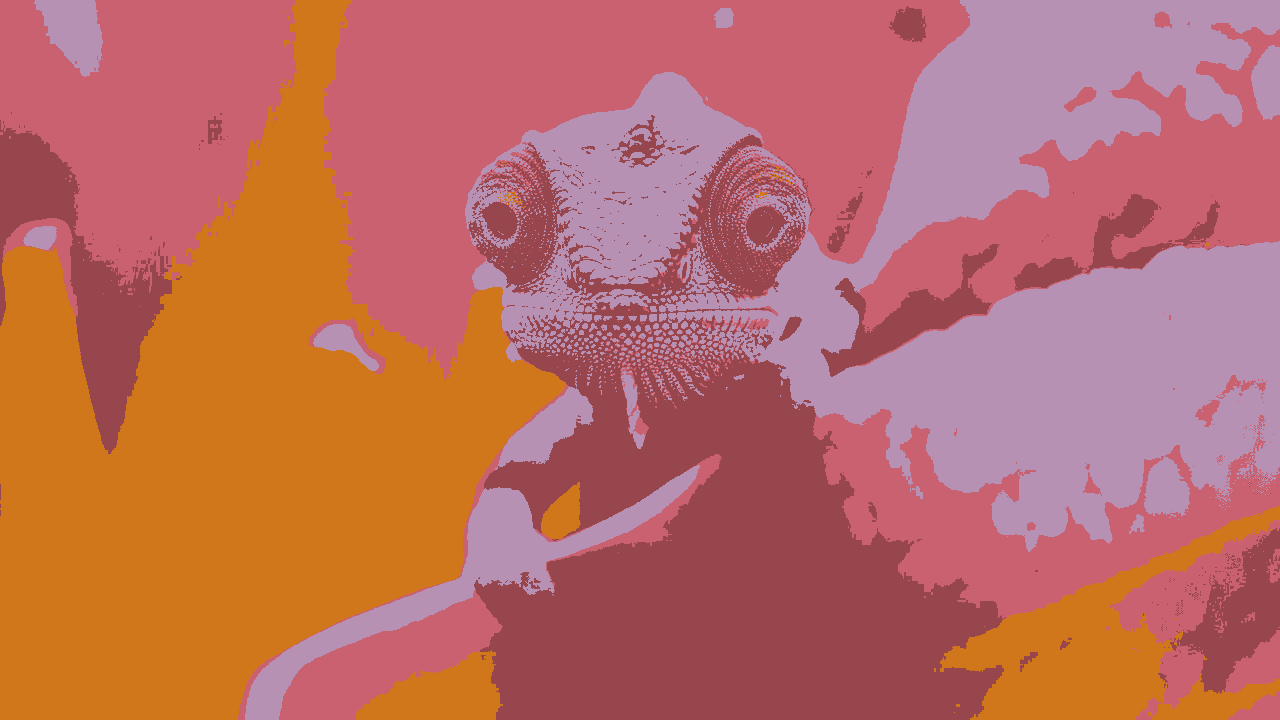

In [105]:
compressed_img_pil

In [96]:
lst = list(df.columns)
lst

[0, 1, 2, 3]

In [98]:
lst.append('d')
lst

[0, 1, 2, 3, 'd', 'd']